In [1]:
#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################

import cartopy

import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

import datetime
import pandas

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

## some other packages
from scipy import stats
from matplotlib import ticker

In [2]:
#########################
######### DICTIONARIES DEFINITION 
#########################

Range_MLD = {
    'lab' : {
        'vmin' : 20, 
        'vmax' : 2000},
    'gul' : {
        'vmin' : 20, 
        'vmax' : 1000},
    'noe' : {
        'vmin' : 10, 
        'vmax' : 1600},
}


#Colorbar parameters
color_bar = {
    'cmap' : 'YlGnBu',
    'orientation' : 'vertical',
    'title_cbr' : 'depth [m]'
}



reg_ext = {
    'lab': {
        'lon' : (-60, -30),
        'lat' : (50, 65),
        'name' : 'Labrador and Irminger Seas'
    },
    'gul': {
        'lon' : (-75, -45),
        'lat' : (30, 45),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-30, -5),
        'lat' : (45, 60),
        'name' : 'North East Sea'
    }
}

In [3]:
def Grid(data_set):
    x = data_set.longitude
    y = data_set.latitude
    
    x, y = np.meshgrid(x, y)
    return(x, y)


## Function to crop the dataset
def Crops(coord, d_set):
    lon1, lon2 = reg_ext[coord]['lon']
    lat1, lat2 = reg_ext[coord]['lat']
    name_fig = reg_ext[coord]['name']

    return(d_set.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2)))


In [4]:
dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
fl_n1 = 'ARMOR_*.nc'

c_armor = xr.open_mfdataset(dir_1 + fl_n1)
mld_a = c_armor.mlotst

## Animations for PDF in time

### All years for Gulf Stream

TypeError: unorderable types: numpy.ndarray() <= numpy.ndarray()

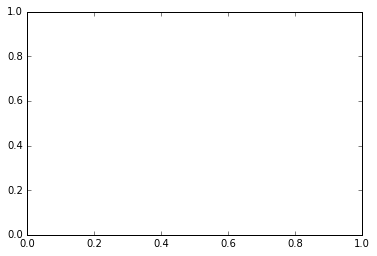

In [19]:
coord = 'gul'
gul_reg = Crops(coord, mld_a)
n_bins = 100

mn = np.nanmin(gul_reg[:])
mx = np.nanmax(gul_reg[:])

heigth = np.empty(n_bins)

d_frame = gul_reg[:].to_dataframe()
gul_nonan = d_frame.dropna(how='any')

values = gul_nonan
n, bins, patches = plt.hist(values, n_bins, range=(mn, mx), facecolor='g', log=True, alpha=0.75)
plt.ylim(10e-1, 10e6)


In [ ]:
import os
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.use('Agg')


N = int(mld_a.time.size)


def generate_one_figure(it=1):
    print(it)
    coord = 'gul'

    dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
    fl_n1 = 'ARMOR_*.nc'

    c_armor = xr.open_mfdataset(dir_1 + fl_n1)
    mld_a = c_armor.mlotst

    cropped_d = Crops(coord, mld_a)
    n_bins = 250

    mn = np.nanmin(cropped_d[:])
    mx = np.nanmax(cropped_d[:])
    
    time = pandas.to_datetime(mld_a.time.values[it])

    fig, ax = plt.subplots(nrows=1, ncols=1)           

    d_frame = cropped_d[it].to_dataframe()
    d_nonan = d_frame.dropna(how='any')
    
    values = d_nonan.mlotst
    n, bins, patches = plt.hist(values, 50, range=(mn, mx), facecolor='g', log=True, alpha=0.75)
    plt.ylim(10e-1, 10e4)
    
    
    plt.xlabel('MLD')
    plt.ylabel('number')
    
    ax.set_title(time)
    fig.savefig(os.path.abspath(os.path.sep.join([".","dummy_images","N-PDF_%0.4d.png" % it])))
    plt.close(fig)
    return None

                       
print('Use %i processes' % multiprocessing.cpu_count() ) 

with multiprocessing.Pool() as pool:
    pool.map(generate_one_figure, np.arange(0,N))     
    
##mencoder "mf://dummy_images/Gul_*.png" -mf fps=10 -o Gulf.avi -ovc lavc -lavcopts vcodec=msmpeg4v2:vbitrate=2500
#ffmpeg -r 3 -f image2 -s 1920x1080 -i dummy_images/N-PDF_%04d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p -q:v 1 N-PDF.mp4

Use 4 processes


/usr/lib/python3/dist-packages/matplotlib/__init__.py:1352: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


0
46
138
92
